In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.basemap import Basemap

china = np.load("seven_parts.npy")
china_shp_path = ("H:\\Region\\区划\\省", "省")  # 中国陆地轮廓
nine_shp_path = ("H:\\Region\\全国shp\\最新2021年全国行政区划\\九段线", "九段线")  # 九段线

C:\Users\alzio\AppData\Local\Temp\ipykernel_23812\1302891646.py:26: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, data, cmap="viridis")
C:\Users\alzio\AppData\Local\Temp\ipykernel_23812\1302891646.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


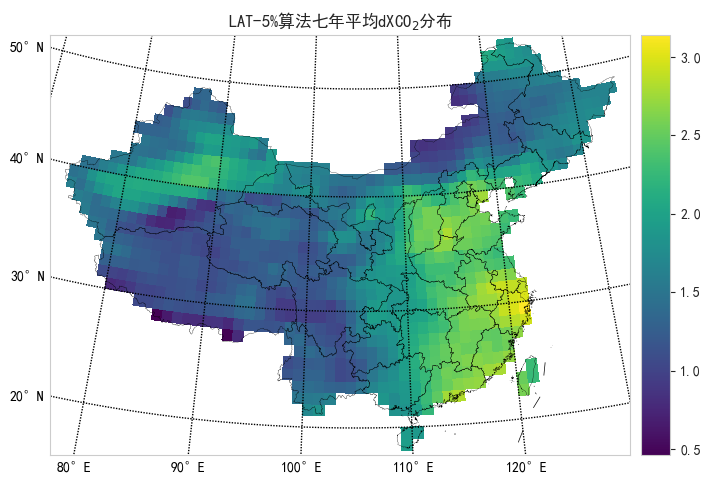

In [3]:
data = np.array([np.load(f"H:\\XCO2\\MappingXCO2\\MappingXCO2_latitude_interp_5percent_year\\MappingXCO2_{year}.npy") for year in range(2014, 2021)]).mean(axis=0)
# data = data.astype(float)
data[~(china>=0)] = np.NaN
# plt.rcParams['axes.facecolor'] = 'black'

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5, 89.5, 180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (8.0, 8.0)
Map = Basemap(projection='aea', resolution='l', lat_0=25.0, lon_0=105.,
              # llcrnrx=-3500000, llcrnry=-1950000, urcrnrx=3500000, urcrnry=1950000,
              llcrnrlon=78., llcrnrlat=15., urcrnrlon=138., urcrnrlat=52.
              )
parallels = np.arange(-70., 71, 10.)

# labels = [left,right,top,bottom]
Map.drawparallels(parallels, labels=[True, False, False, False])
meridians = np.arange(0., 361., 10.)
Map.drawmeridians(meridians, labels=[False, False, False, True])
Map.readshapefile(*china_shp_path, linewidth=0.2, antialiased=True)
Map.readshapefile(*nine_shp_path)

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, data, cmap="viridis")
mapPlot.cmap.set_under('w')  # 设置底色
cbar = Map.colorbar(mapPlot, fraction=0.023)
plt.title("LAT-5%算法七年平均dXCO$_2$分布")
plt.show()

In [4]:
# dXCO2与CO2关系图绘制（5%算法）
dataPath = {# "MappingXCO2": f"H:\\XCO2\\MappingXCO2\\MappingXCO2_sliding{num}_5percent_year\\",
            # "MOD17A3HGFv061": "H:\\NPP\\MOD17A3HGFv061\\npy\\",
            # "GOSIF": "H:\\SIF\\GOSIF_v2\\Annual\\npy\\",
            "LandScan_global": "H:\\Population\\LandScan_global\\npy_sum\\",
            # "VIIRS_annual_v21": "H:\\Nighttime Light\\VIIRS_annual_v21\\npy\\",
            "ODIAC": "H:\\CO2\\ODIAC\\2022\\year\\"}



def data_load():
    data = {}
    for key in dataPath:
        files = [dataPath[key] + f"{key}_{y}.npy" for y in range(2014, 2021)]
        data_key = np.array([np.load(f) for f in files])
        data[key] = data_key

    return data

Text(0, 0.5, 'CO$_2$ Emissions ($gC/m^2/d$)')

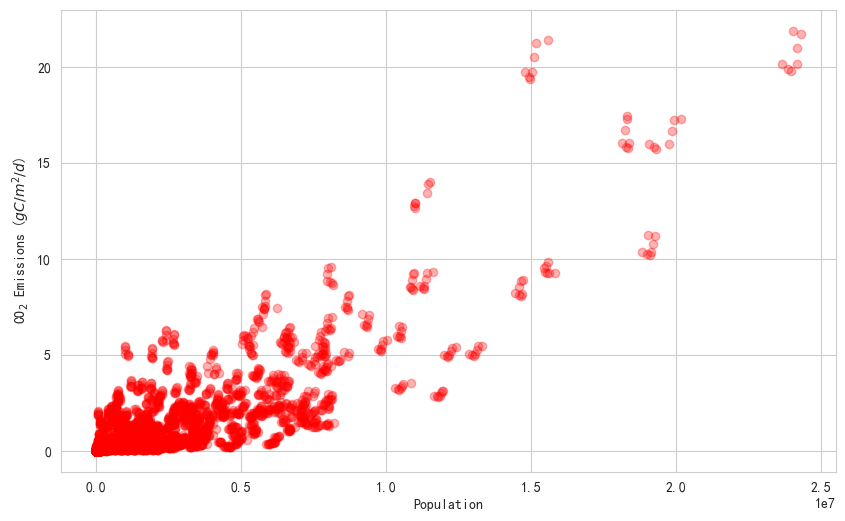

In [5]:
data = data_load()
china = (np.load("seven_parts.npy") >= 0)
china = np.expand_dims(china, axis=0).repeat(7, axis=0)

# plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10, 6))
plt.scatter(data["LandScan_global"][china], data["ODIAC"][china], c="r", alpha=0.3)
plt.xlabel("Population")
plt.ylabel("CO$_2$ Emissions ($gC/m^2/d$)")